# Term Project - Group 4

## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
import statsmodels.formula.api as sm 
import statsmodels.api as sm2

%matplotlib inline

In [2]:
housing = pd.read_csv('Housing Dataset.csv')

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- 1460 houses in the dataset, majority of columns are fairly complete
- Many of the features describe physical attributes of each home, for the purpose of statistical inference it might be ok to ignore these house-specific features and look at broader things like neighbourhood, overall condition, timeseries aspects
- Sales Price is the dependent variable here, ultimately the target of any predictive model we make

In [4]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Mean is higher than median for sales price, indicating slight postive skew with outliers

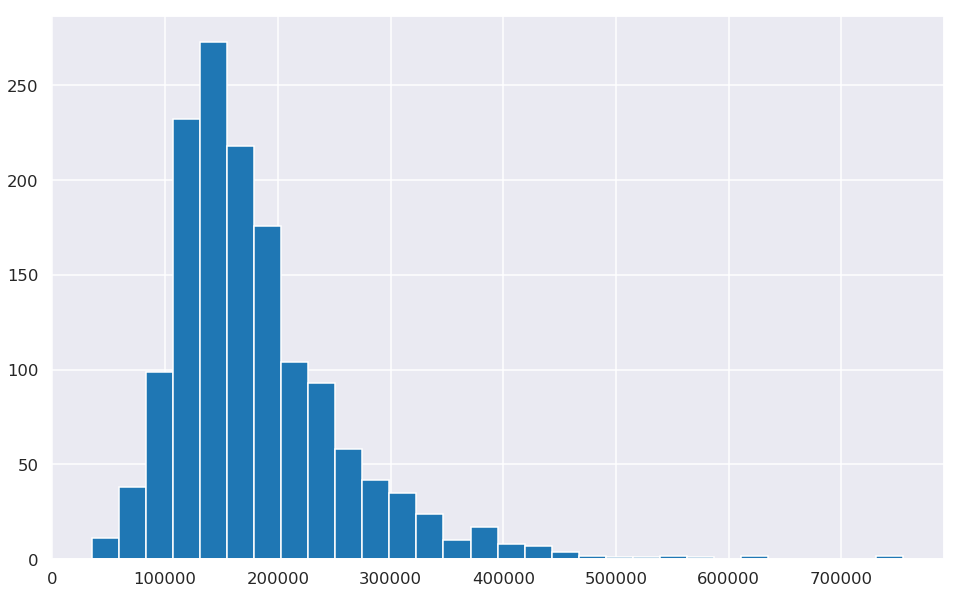

In [5]:
plt.figure(figsize=(16,10))

housing['SalePrice'].hist(bins=30)

- Histogram indicates right skewed distribution

## Timeseries Analysis

Looking at Date Sold, Date Built

- When were the houses in neighbourhoods built? Perhaps this could uncover some of the history of Ames' development
- Quality of house when sold vs original time it was built
- Age of a house before it's sold
- When in the year are most houses sold? Any trends that could be useful to realtors?
- Gentrifying? What neighbourhoods are on the rise?

### Date Sold

In [6]:
housing[['MoSold', 'YrSold']].head()

,MoSold,YrSold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008


In [7]:
import datetime

In [8]:
def date_sold(row):
    """combines MoSold and YrSold into a single date attribute"""
    y = row.YrSold
    m = row.MoSold
    datetime_obj = datetime.datetime.strptime("{} {}".format(m,y), "%m %Y")
    return datetime_obj

In [9]:
date_sold(housing.iloc[1])

datetime.datetime(2007, 5, 1, 0, 0)

In [10]:
housing['DateSold'] = housing.apply(date_sold, axis=1)

In [11]:
housing.DateSold.head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: DateSold, dtype: datetime64[ns]

In [12]:
housing_ts = housing.set_index(pd.DatetimeIndex(housing.DateSold))
housing_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold
DateSold,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
2007-05-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2008-09-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
2006-02-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
2008-12-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01
2009-10-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,2009-10-01
2007-08-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,2007-08-01
2009-11-01,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,2009-11-01
2008-04-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,2008-04-01


Text(0.5, 0, 'Date Sold')

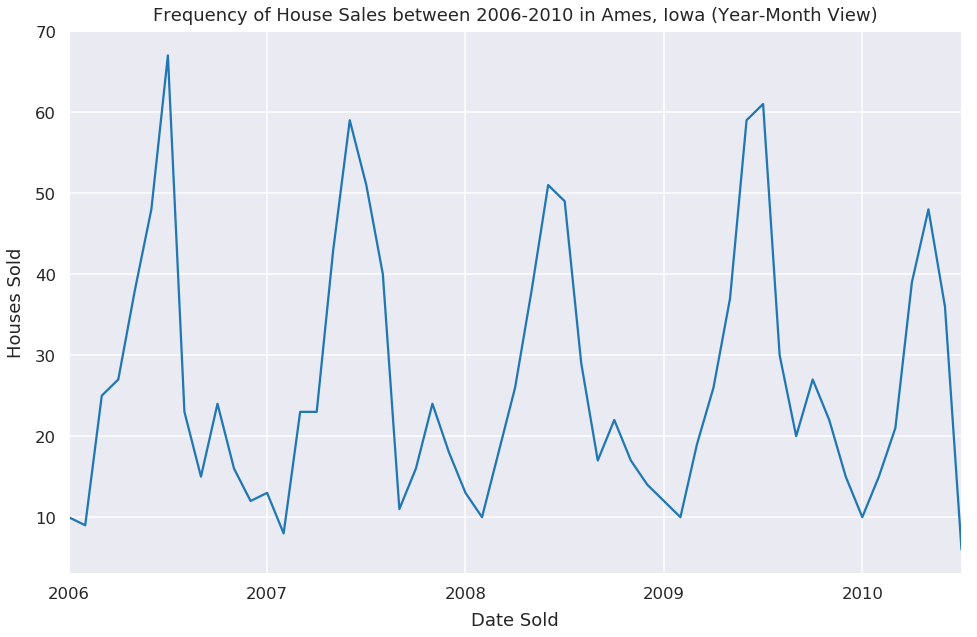

In [13]:
plt.figure(figsize=(16,10))

housing_ts.resample('M').Id.count().plot()
plt.title("Frequency of House Sales between 2006-2010 in Ames, Iowa (Year-Month View)", pad=10)
plt.ylabel("Houses Sold", labelpad=10)
plt.xlabel("Date Sold", labelpad=10)

- Very clear indication of seasonality when it comes to housing sales, most houses are sold during the middle of the year

In [14]:
housing_ts.groupby(['MoSold']).count().Id.sort_values(ascending=False)

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: Id, dtype: int64

- May, June, July (Months 5,6,7) are when most houses get sold
- The beginning/end of each year are when the least houses are sold

- Is avg. sale price affected by seasonality as well? Do you get more if you sell a house at a specific point in time?
- Also, looking at how the market prices have fluctuated over time:

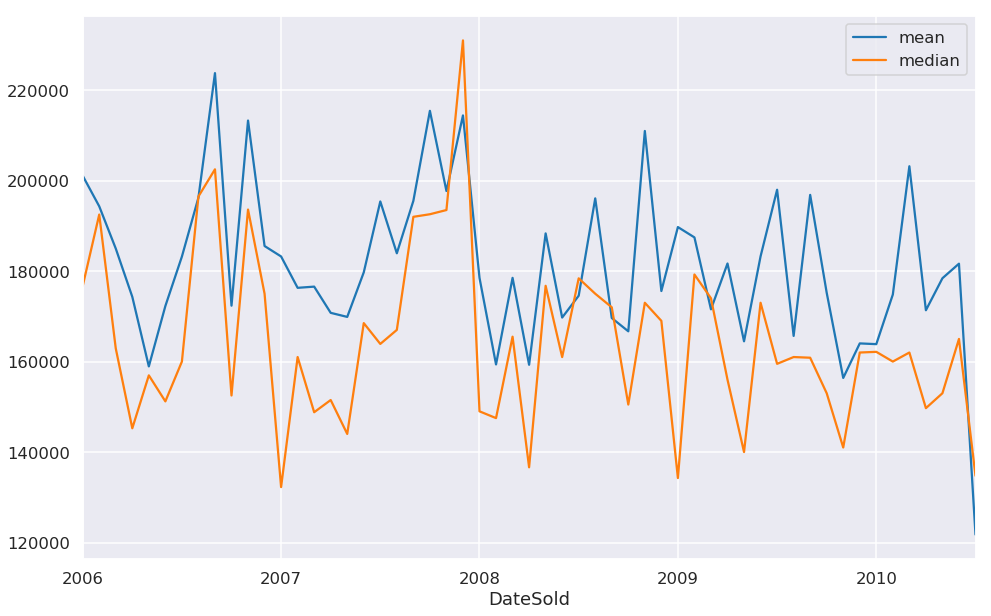

In [15]:
plt.figure(figsize=(16,10))

housing_ts.resample('M').SalePrice.mean().plot(label="mean")
housing_ts.resample('M').SalePrice.median().plot(label="median")

plt.legend()

- No clear pattern of seasonality here
- Sales prices seems to be trending slightly downwards over time

Resampling to a yearly view:

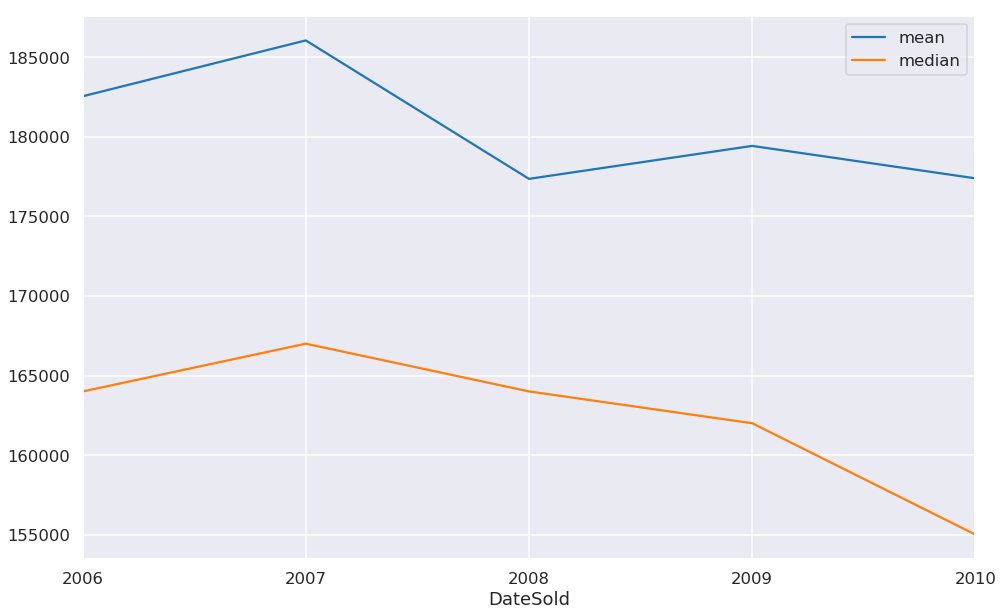

In [16]:
plt.figure(figsize=(16,10))

housing_ts.resample('Y').SalePrice.mean().plot(label="mean")
housing_ts.resample('Y').SalePrice.median().plot(label="median")

plt.legend()

- Perhaps due to 2009 housing crisis?

### Year Built, House Age

- Which neighbourhoods grew over time? (houses built)

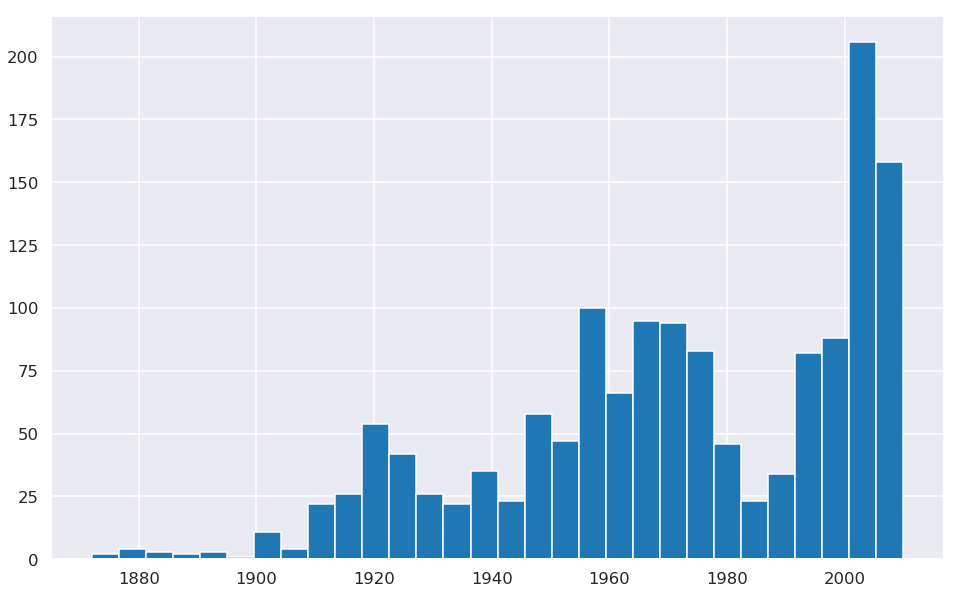

In [17]:
plt.figure(figsize=(16,10))

housing_ts['YearBuilt'].hist(bins=30)

- Distribution of houses built is multimodal, peaks in the 1960s-80s and 1990s-2000s
- What caused these spurs of development over time?
- Periods of economic growth/stagnation in Ames?

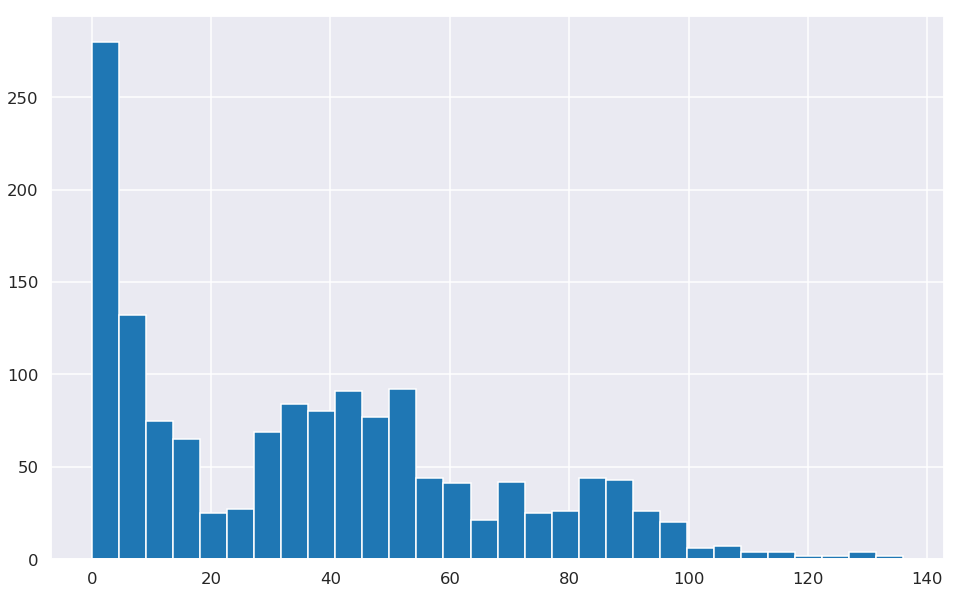

In [18]:
housing_ts['HouseAge'] = housing_ts.YrSold - housing_ts.YearBuilt

plt.figure(figsize=(16,10))
housing_ts.HouseAge.hist(bins=30)

- Somewhat exponential distribution of housing ages before they're sold
- Most of the houses sold are very new, but there's a good portion that get sold after they're 20-60 years old
- Could do statistical inference here to find parameters for exponential distribution of housing ages, using MCMC/PyMC3 model
- Is there a correlation b/w house age and house condition at time of sale?
- Look into year of Remodeling too

Text(0.5, 0, 'Age in Years at Time of Sale')

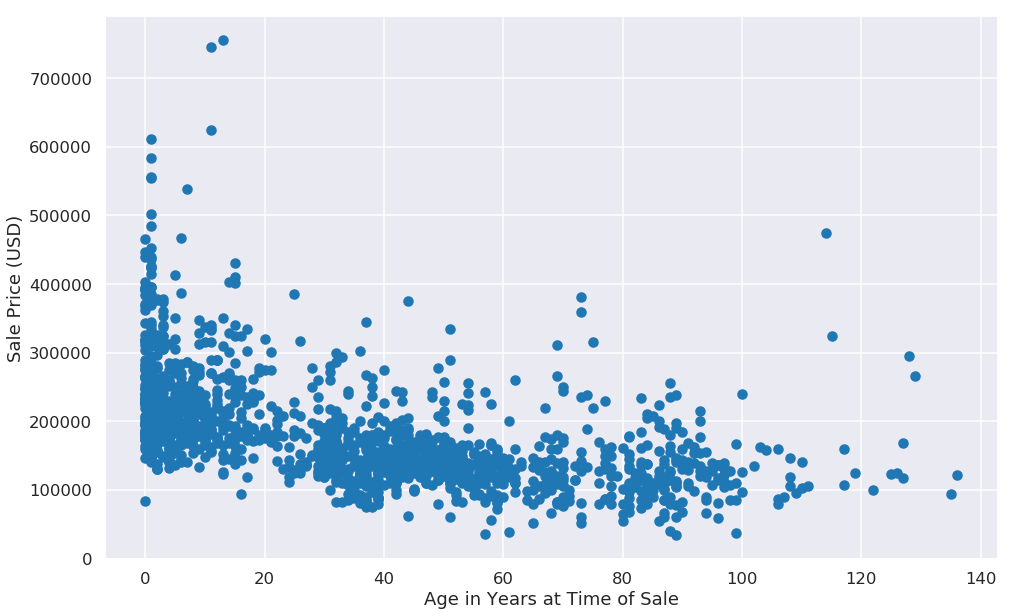

In [19]:
plt.figure(figsize=(16,10))

plt.scatter(housing_ts.HouseAge, housing_ts.SalePrice)
plt.ylabel("Sale Price (USD)")
plt.xlabel("Age in Years at Time of Sale")

Text(0.5, 1.0, 'House Age vs. Sale Price')

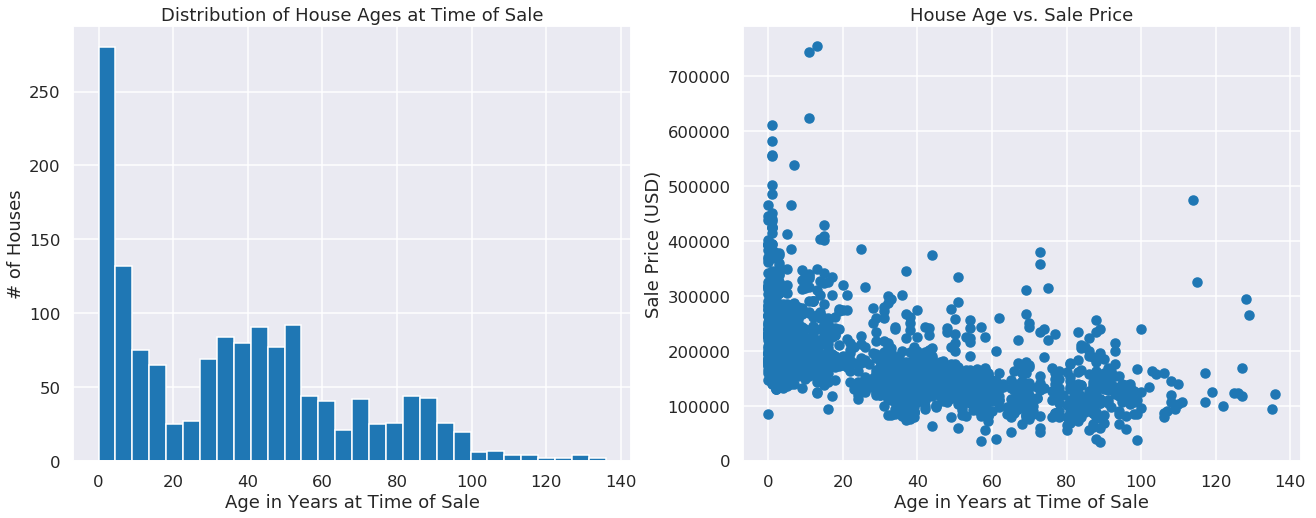

In [20]:
plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
housing_ts.HouseAge.hist(bins=30)
plt.ylabel("# of Houses")
plt.xlabel("Age in Years at Time of Sale")
plt.title("Distribution of House Ages at Time of Sale")

plt.subplot(1,2,2)
plt.scatter(housing_ts.HouseAge, housing_ts.SalePrice)
plt.ylabel("Sale Price (USD)")
plt.xlabel("Age in Years at Time of Sale")
plt.title("House Age vs. Sale Price")

In [21]:
housing_ts[['HouseAge', 'SalePrice']].corr()

,HouseAge,SalePrice
HouseAge,1.00000,-0.52335
SalePrice,-0.52335,1.00000


- Moderate negative relationship between Sale Price and age of house at time of sale

### The growth of different neighbourhoods over time

- Lets see the rates at which houses were built in each of Ames' neighbourhoods

In [22]:
housing_ts.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Change neighborhood abbreviations to actual names

In [23]:
neighbourhood_names = {
    "Blmngtn": "Bloomington Heights",
    "Blueste": "Bluestem",
    "BrDale": "Briardale",
    "BrkSide": "Brookside",
    "ClearCr": "Clear Creek",
    "CollgCr": "College Creek",
    "Crawfor": "Crawford",
    "Edwards": "Edwards",
    "Gilbert": "Gilbert",
    "IDOTRR": "Iowa DOT and Rail Road",
    "MeadowV": "Meadow Village",
    "Mitchel": "Mitchell",
    "NAmes": "North Ames",
    "NoRidge": "Northridge",
    "NPkVill": "Northpark Villa",
    "NridgHt": "Northridge Heights",
    "NWAmes": "Northwest Ames",
    "OldTown": "Old Town",
    "SWISU": "South & West of Iowa State University",
    "Sawyer": "Sawyer",
    "SawyerW": "Sawyer West",
    "Somerst": "Somerset",
    "StoneBr": "Stone Brook",
    "Timber": "Timberland",
    "Veenker": "Veenker"
}

housing_ts.Neighborhood = housing_ts.Neighborhood.apply(lambda x: neighbourhood_names[x])

- First let's see the size of different neighbourhoods

Text(0.5, 0, '# of Houses')

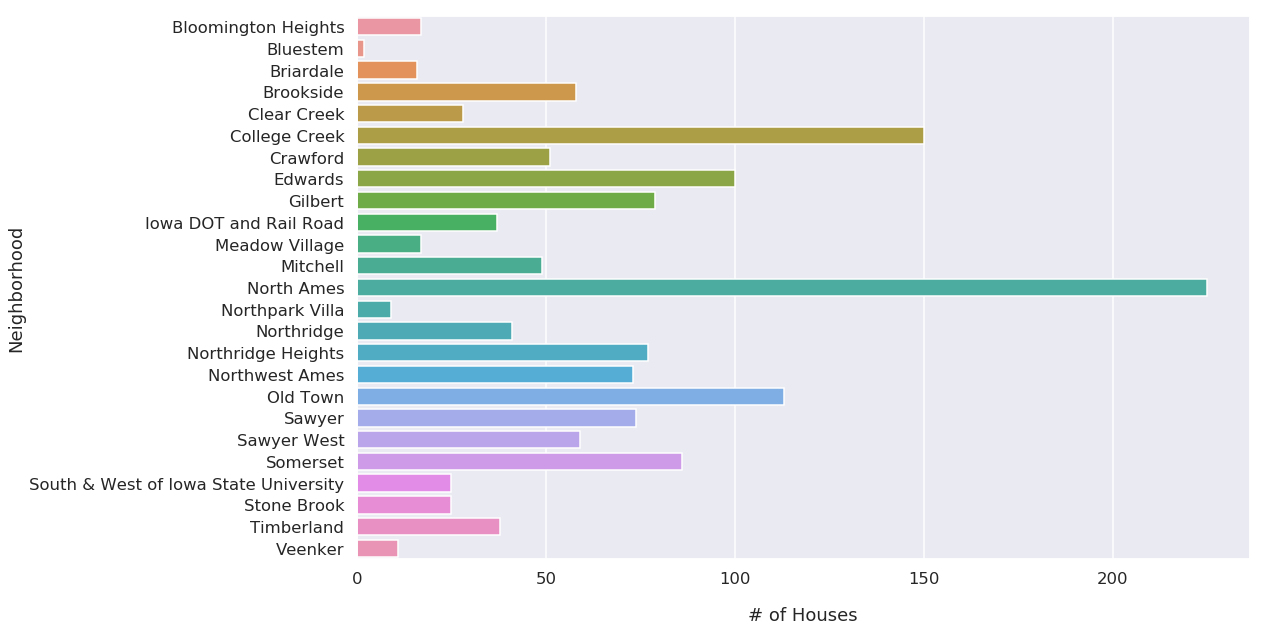

In [24]:
neighbourhood_size = housing_ts.groupby('Neighborhood').Id.count()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_size.index, x=neighbourhood_size)
plt.xlabel("# of Houses", labelpad=20)

- North Ames, College Creek, Old Town have the most houses

Let's also check the median sale price per neighbourhood:

Text(0.5, 0, 'Median Sale Price')

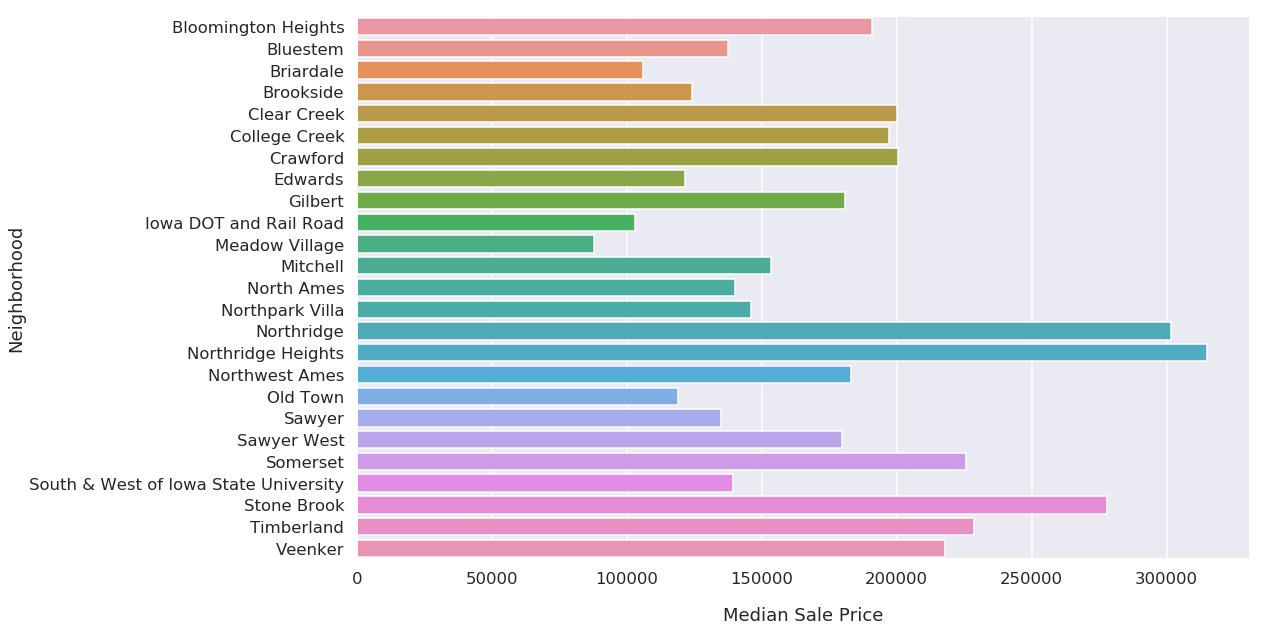

In [25]:
neighbourhood_median_price = housing_ts.groupby('Neighborhood').SalePrice.median()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_median_price.index, x=neighbourhood_median_price)
plt.xlabel("Median Sale Price", labelpad=20)

- Northridge area seems to be the pricey part of town, with Stone Brook, Timberland, Somerset, and Veenker following up
- Meadow Village and Iowa DOT seem to be cheap parts

Moving onto the number of houses built in each area over time:

In [26]:
housing_ts.YearBuilt = housing_ts.YearBuilt.apply(lambda x: datetime.datetime.strptime(str(x), '%Y'))

In [27]:
housing_built_ts = housing_ts.set_index(pd.DatetimeIndex(housing_ts.YearBuilt))
housing_built_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold,HouseAge
YearBuilt,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01,5
1976-01-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01,31
2001-01-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01,7
1915-01-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01,91
2000-01-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01,8
1993-01-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000,2009-10-01,16
2004-01-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000,2007-08-01,3
1973-01-01,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Shed,350,11,2009,WD,Normal,200000,2009-11-01,36
1931-01-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2008,WD,Abnorml,129900,2008-04-01,77


First, let's see the development of all housing in Boston over time:

Text(0.5, 0, 'Year')

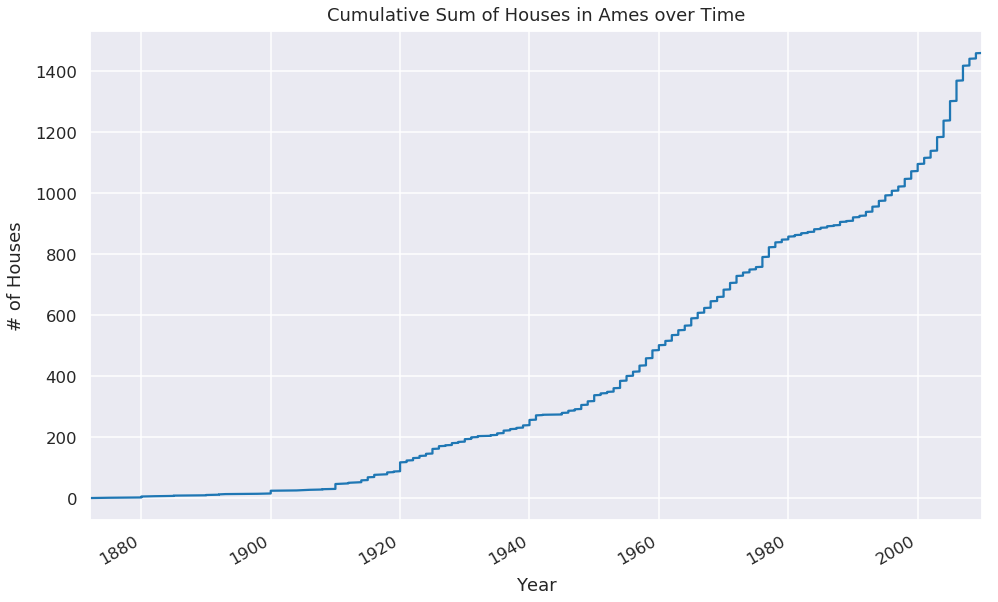

In [28]:
plt.figure(figsize=(16,10))

housing_built_ts['Count'] = 1
housing_built_ts.sort_index().Count.cumsum().plot()

plt.title("Cumulative Sum of Houses in Ames over Time", pad=10)
plt.ylabel("# of Houses", labelpad=10)
plt.xlabel("Year", labelpad=10)

- Spikes in development between 1950-1980 and 1990 onwards

Separating into individual neighbourhoods:

Text(0.5, 0, 'Year')

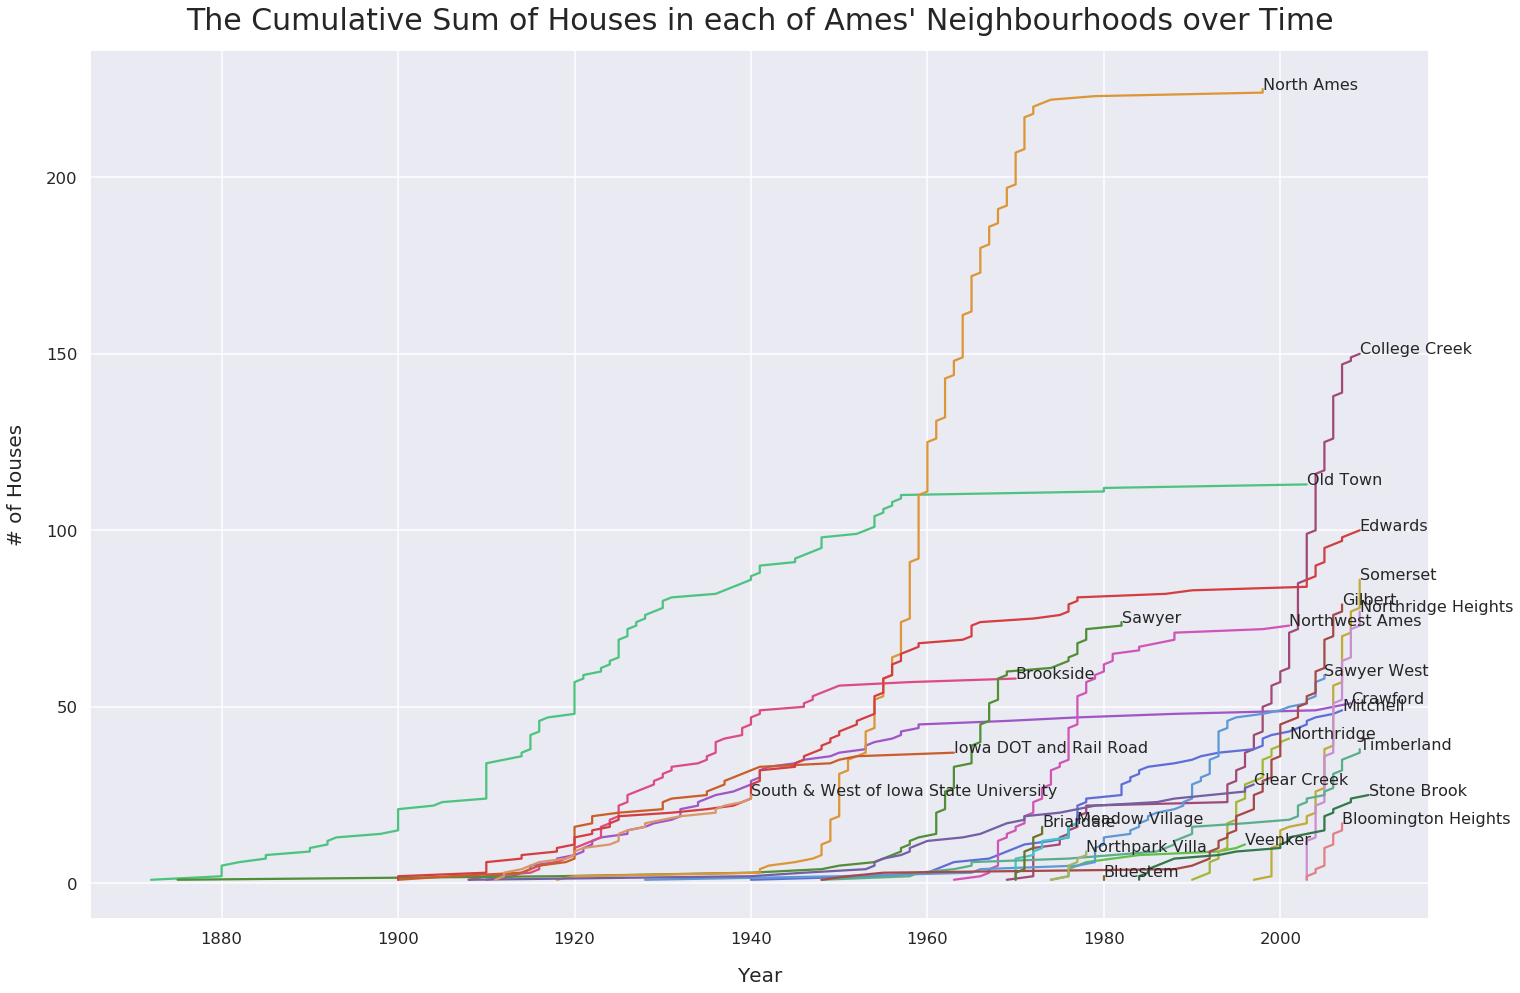

In [29]:
palette = ["#a14a77", "#62bf4b", "#9f56c7", "#a1b837", "#5e6ed9", "#c0ab39", "#d055b6",
           "#4dc381", "#dd4b85", "#508f36", "#c98fd2", "#dc9636", "#5e99d5", "#ca5e2b", 
           "#43c4c4", "#d43e41", "#5bae8a", "#a74949", "#33784a", "#745fa2", "#a7b26b",
           "#e28085", "#697329", "#da9669", "#91692d"]

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(24, 16))

for neighbourhood, color in zip(housing_built_ts.Neighborhood.unique(), palette):
    neighbourhood_data = housing_built_ts[housing_built_ts.Neighborhood == neighbourhood]
    houses_cumsum = neighbourhood_data.sort_index().Count.cumsum()
    plt.plot(houses_cumsum.index, houses_cumsum.values, label=neighbourhood, c=color)
    plt.annotate(neighbourhood, (houses_cumsum.index[-1], houses_cumsum.values[-1]), fontsize=16)

#plt.legend()

plt.title("The Cumulative Sum of Houses in each of Ames' Neighbourhoods over Time", fontsize=30, pad=20)
plt.ylabel("# of Houses", fontsize=20, labelpad=20)
plt.xlabel("Year", fontsize=20, labelpad=20)
    

## Comparing Sale Price of New vs. Old Houses

Let's divide the houses into new and old, using 1990 as the dividing point between the two groups. 1990 was chosen since it was the beginning of a surge in houses being built (see two plots above)

In [30]:
housing_built_ts.index < '1990-01-01'

array([False,  True, False, ...,  True,  True,  True])

In [31]:
new_houses = housing_built_ts[housing_built_ts.index >= '1990-01-01']
old_houses = housing_built_ts[housing_built_ts.index <= '1990-01-01']

In [32]:
n_new = len(new_houses)
n_old = len(old_houses)

print("# of new houses: {}\n# of old houses: {}".format(n_new, n_old))

# of new houses: 551
# of old houses: 921


Text(0.5, 1.0, 'Sales Prices for New and Old Homes')

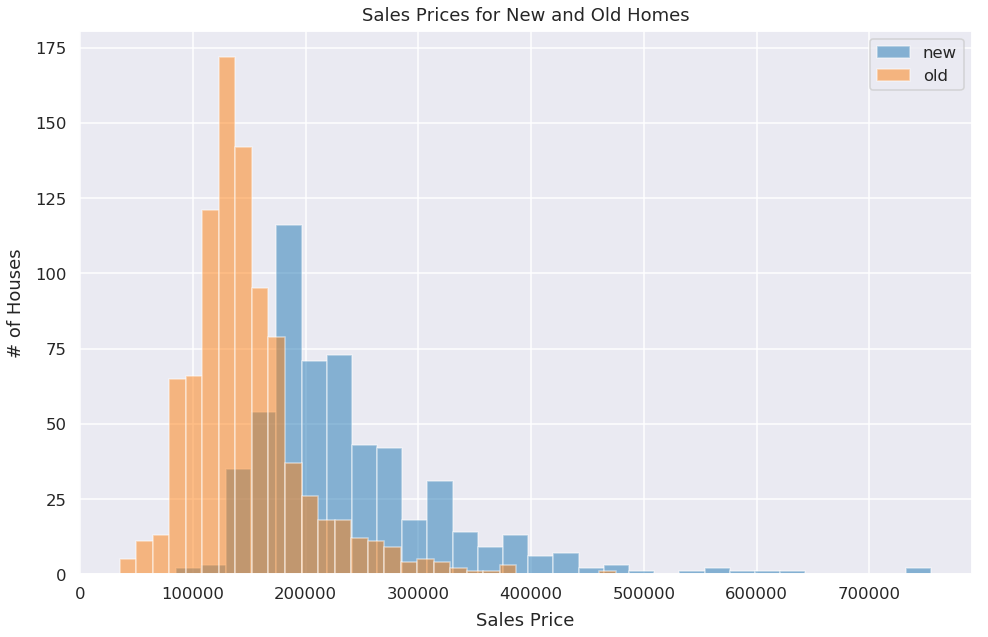

In [33]:
plt.figure(figsize=(16,10))

new_houses.SalePrice.hist(bins=30, alpha=0.5, label='new')
old_houses.SalePrice.hist(bins=30, alpha=0.5, label='old')

plt.legend()
plt.ylabel("# of Houses", labelpad=10)
plt.xlabel("Sales Price", labelpad=10)

plt.title("Sales Prices for New and Old Homes", pad=10)

- A lot of overlap between the two groups, but still some slight difference

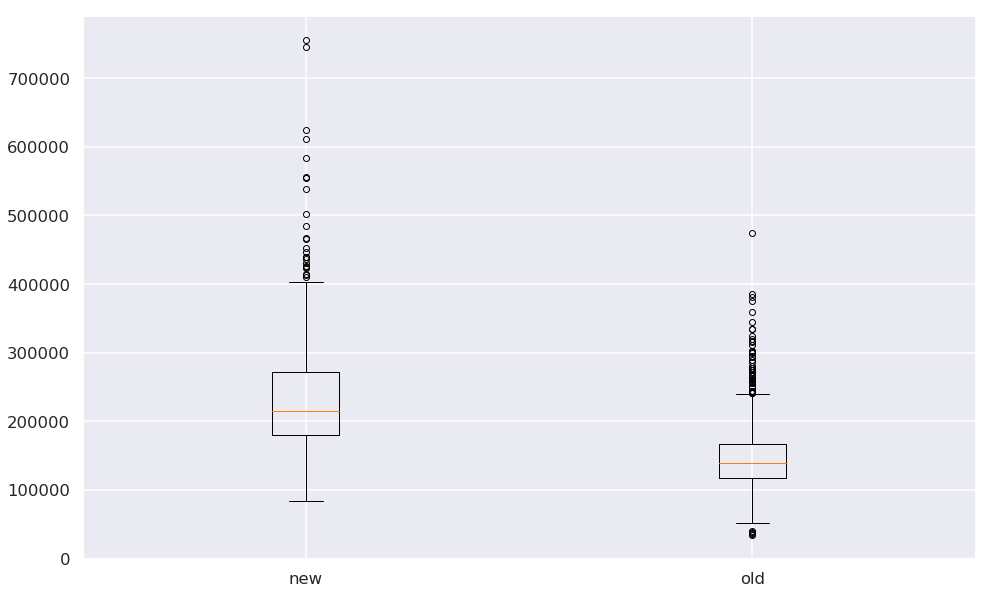

In [34]:
plt.figure(figsize=(16,10))

plt.boxplot([new_houses.SalePrice, old_houses.SalePrice], labels=['new', 'old'])
plt.show()

## NHST

**Now that we've examined the difference in means between new and old homes, we can attempt using a Welch's T-Test**

HO: A home being new or old (pre/post 1990) has no significant impact on its price<br>
HA: There is a statistically significant difference between the sales prices of new and old homes

We'll test this at a significance level of 0.1

In [35]:
significance_level = 0.1

In [36]:
new_house_array = np.array(new_houses.SalePrice)
old_house_array = np.array(old_houses.SalePrice)

In [37]:
new_mean = new_house_array.mean()
old_mean = old_house_array.mean()

print("Mean Sales Price for New Homes: {}\nMean Sales Price for Old Homes: {}".format(new_mean, old_mean))

Mean Sales Price for New Homes: 238287.26497277676
Mean Sales Price for Old Homes: 147121.8707926167


In [38]:
from scipy import stats

In [39]:
stat, p = stats.ttest_ind(new_house_array, old_house_array, equal_var=False)

In [40]:
stat

22.737450080831522

In [41]:
p

2.3186886258009758e-88

In [42]:
p < significance_level

True

Reject H0 in favour of HA: there is a significant difference in price between new and old houses

## MCMC Model for House Age

- Use MCMC to get optimal parameter for exponential distribution fit to house age

In [43]:
import pymc3 as pm

In [44]:
with pm.Model():
    #Prior
    
    lam = pm.Uniform("lam", lower=0, upper=1, testval=0.5)
    
    #Likelihood
    likelihood = pm.Exponential("likelihood", lam=lam, observed=housing_ts.HouseAge)
    
    #Posterior
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(100000, njobs=3, step=step, start=start, progressbar=True)
    burned_trace = trace[3000::2]

logp = -27,692, ||grad|| = 12,610: 100%|██████████| 9/9 [00:00<00:00, 2324.72it/s]
Multiprocess sampling (3 chains in 3 jobs)
Metropolis: [lam]
Sampling 3 chains: 100%|██████████| 301500/301500 [00:30<00:00, 9923.17draws/s] 
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1af45da940>,
      dtype=object)

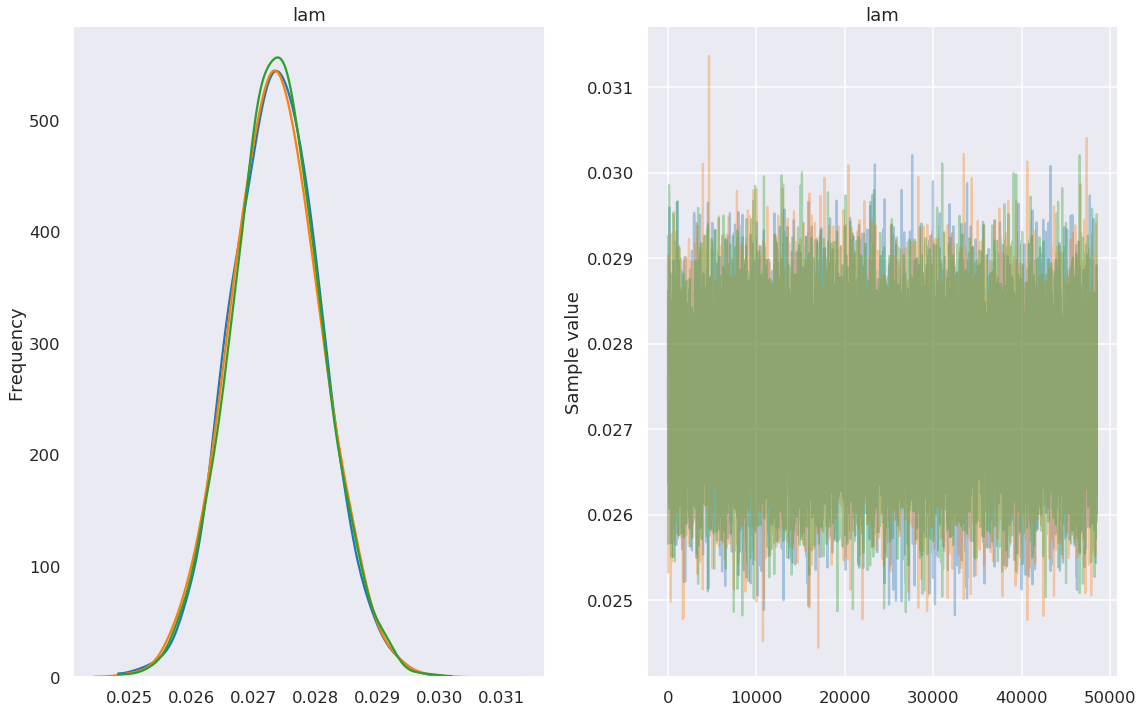

In [45]:
pm.traceplot(burned_trace, figsize=(16,10))

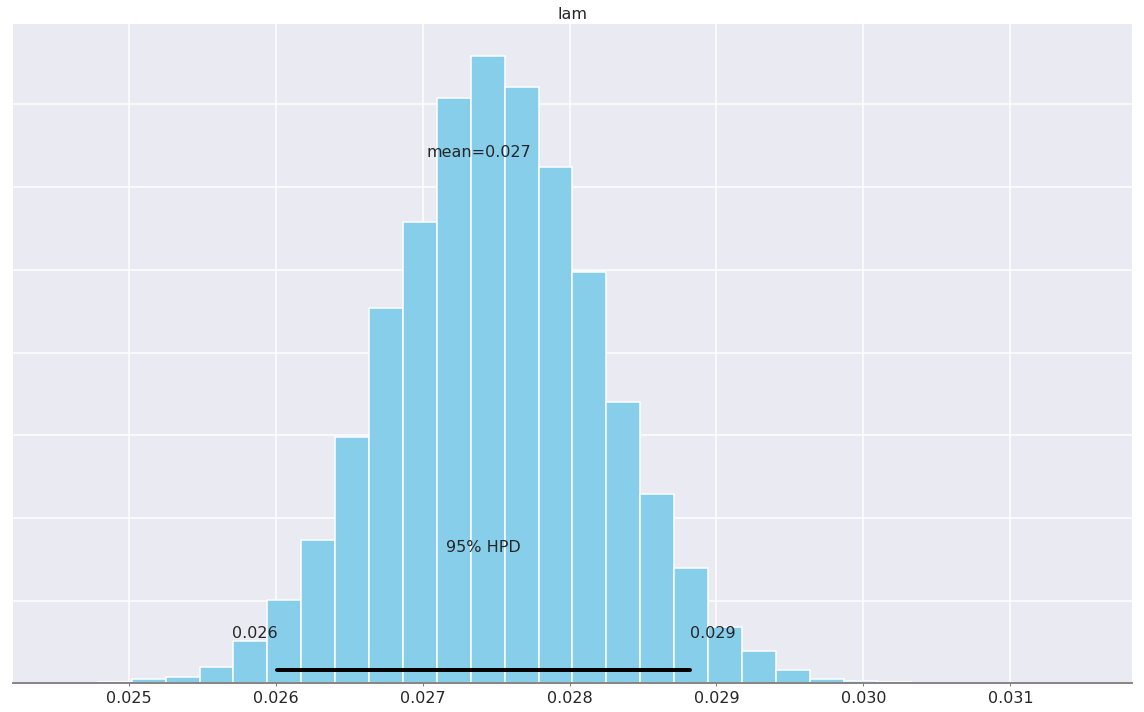

In [46]:
pm.plot_posterior(burned_trace, figsize=(16,10))

In [47]:
lam_posterior = np.array([point["lam"] for point in trace.points()]).mean()

In [48]:
1/lam_posterior # the average house age before sale assuming the data is exponentially distributed

36.52222388757895

In [49]:
from scipy import stats

Text(0.5, 0, 'House Age')

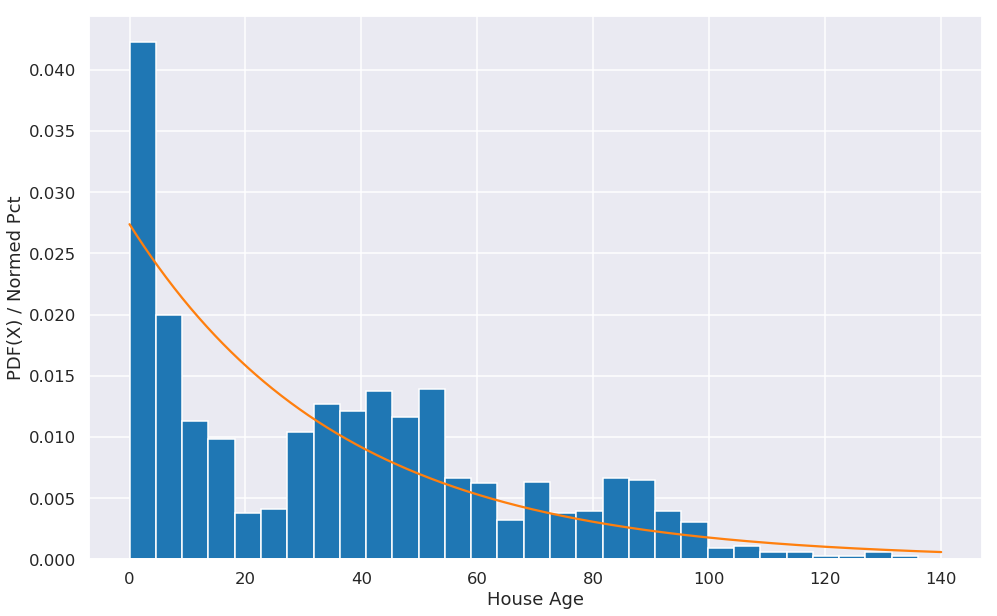

In [50]:
plt.figure(figsize=(16,10))

plt.hist(housing_ts.HouseAge, bins=30, normed=True)
#housing_ts.HouseAge.hist(bins=30)
x = np.linspace(0, 140, 1000)
plt.plot(x, stats.expon.pdf(x, scale=1/lam_posterior))
plt.ylabel("PDF(X) / Normed Pct")
plt.xlabel("House Age")

- This exponential fit does an OK job of approximating the data, not great
- Could do Chi Squared Test for goodness of fit but probably won't

Look at the cumulative density function to make claims about probability of sale at certain ages:

Text(0, 0.5, 'CDF(X)')

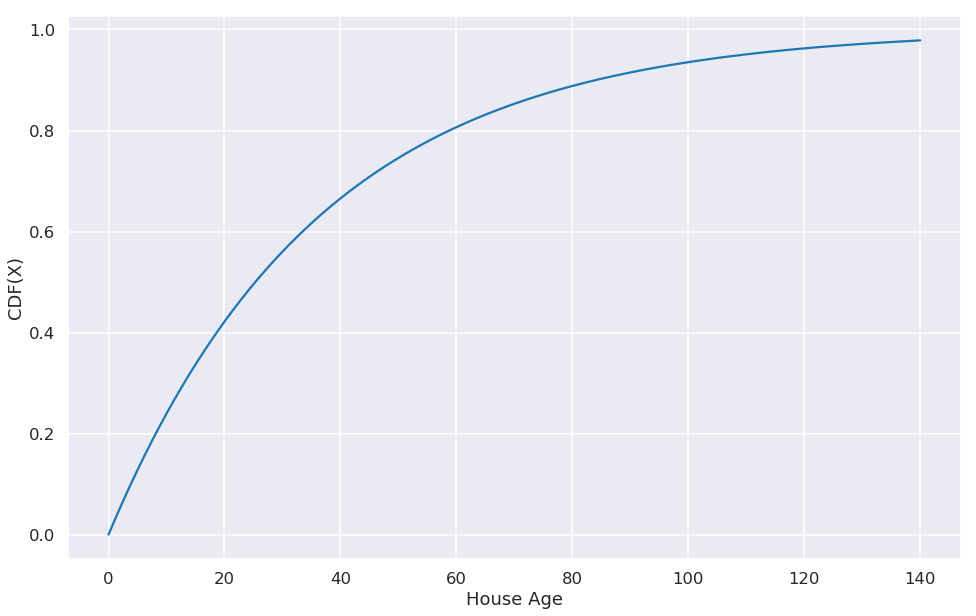

In [51]:
plt.figure(figsize=(16,10))

plt.plot(x, stats.expon.cdf(x, scale=1/lam_posterior))
plt.xlabel("House Age")
plt.ylabel("CDF(X)")

- About a 40% probability that a house is sold before it is 20 years old across the entire city, given this model

## Housing Type, SalePrice, Neighbourhood

Questions:

*Just when I saw some neighbourhoods with way more units (eg north ames) my next question was ok...is it because the types of houses are different and sq footage is smaller?*

In [52]:
housing_ts.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [53]:
building_names = {"1Fam": "Single-family Detached",
                  "2fmCon": "Two-family Conversion",
                  "Duplex": "Duplex",
                  "TwnhsE": "Townhouse End Unit",
                  "Twnhs": "Townhouse Inside Unit"
                 }

housing_ts.BldgType = housing_ts.BldgType.apply(lambda x: building_names[x])

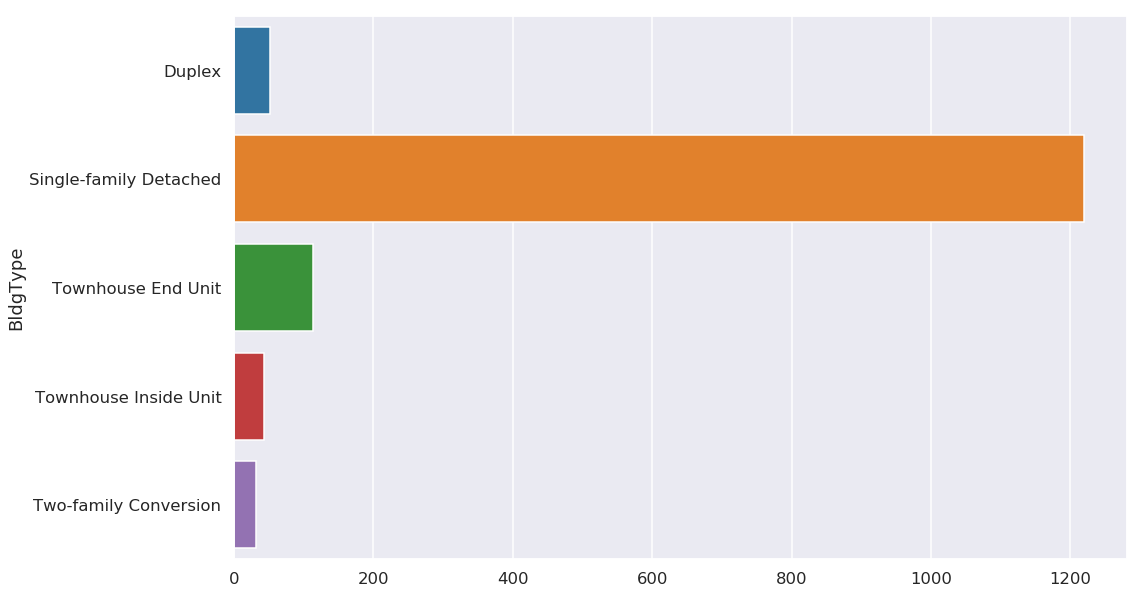

In [54]:
building_types = housing_ts.groupby('BldgType')

plt.figure(figsize=(16,10))
sns.barplot(building_types.Id.count().values, building_types.Id.count().index)

- Vast majority of buildings are Single-family homes, detached units
- This likely won't lead to an explanation between prices in different neighbourhoods; they all mostly consist of single family homes

### Basement Squared Feet, Neighbourhood, Price

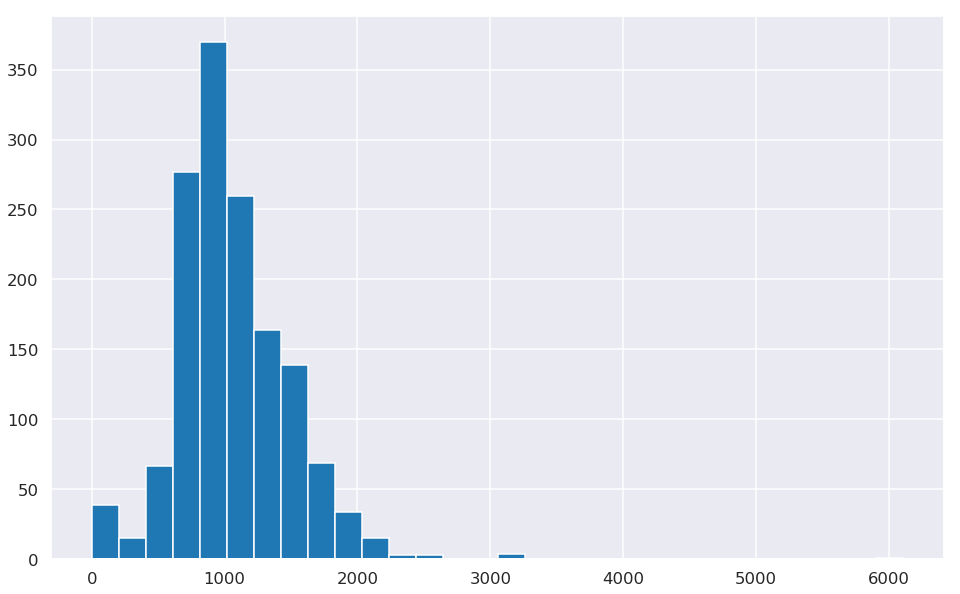

In [55]:
plt.figure(figsize=(16,10))
housing_ts.TotalBsmtSF.hist(bins=30)

- Normal-like distribution around 1000sqft, there are some outliers for vastly bigger homes (6x)

Text(0.5, 0, 'Total Basement Squared Feet')

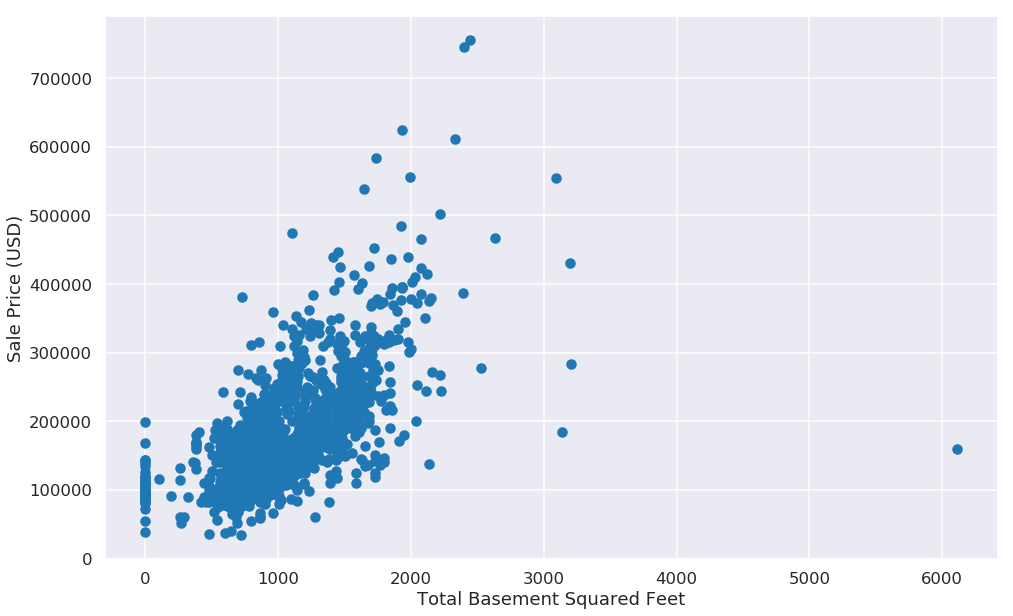

In [56]:
plt.figure(figsize=(16,10))

plt.scatter(housing_ts.TotalBsmtSF, housing_ts.SalePrice)
plt.ylabel("Sale Price (USD)")
plt.xlabel("Total Basement Squared Feet")

- The expected positive relationship between house size and price is evident here
- May be some errors here with houses at 0 sqft
- Big outlier for house at 6000 sqft

In [57]:
housing_ts[['TotalBsmtSF', 'SalePrice']].corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


- Moderate Positive Relationship here between the two

Text(0.5, 0, 'Median Total Squared Feet')

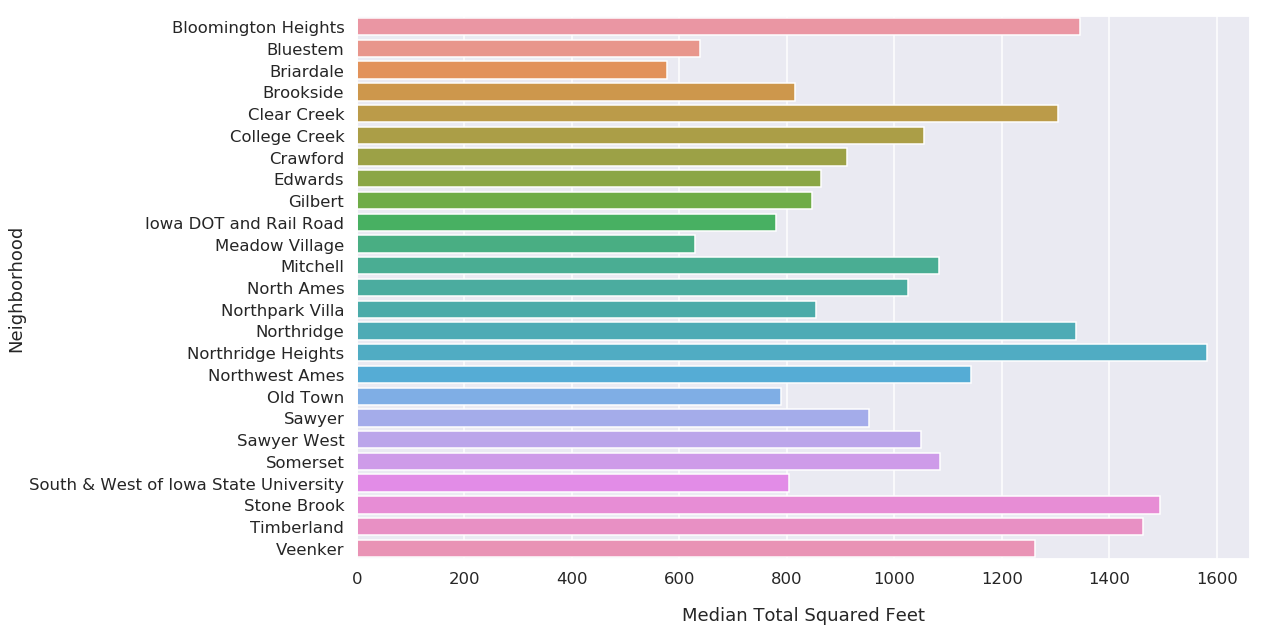

In [58]:
neighbourhood_median_sqft = housing_ts.groupby('Neighborhood').TotalBsmtSF.median()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_median_sqft.index, x=neighbourhood_median_sqft)
plt.xlabel("Median Total Squared Feet", labelpad=20)

- This doesn't tell me much since it's hard to remember which places were the most pricey

Create a pivot table as separate df for neighbourhood stats:

In [59]:
neighbourhoods = housing_ts.pivot_table(index='Neighborhood', values=['SalePrice', 'TotalBsmtSF'], aggfunc='median')

In [60]:
neighbourhoods['Size'] = neighbourhood_size

In [61]:
neighbourhoods

,SalePrice,TotalBsmtSF,Size
Neighborhood,,,
Bloomington Heights,191000,1346.0,17
Bluestem,137500,638.5,2
Briardale,106000,577.5,16
Brookside,124300,816.0,58
Clear Creek,200250,1305.0,28
College Creek,197200,1056.0,150
Crawford,200624,912.0,51
Edwards,121750,864.0,100
Gilbert,181000,847.0,79


Text(0.5, 0, 'Total Basement Sqft.')

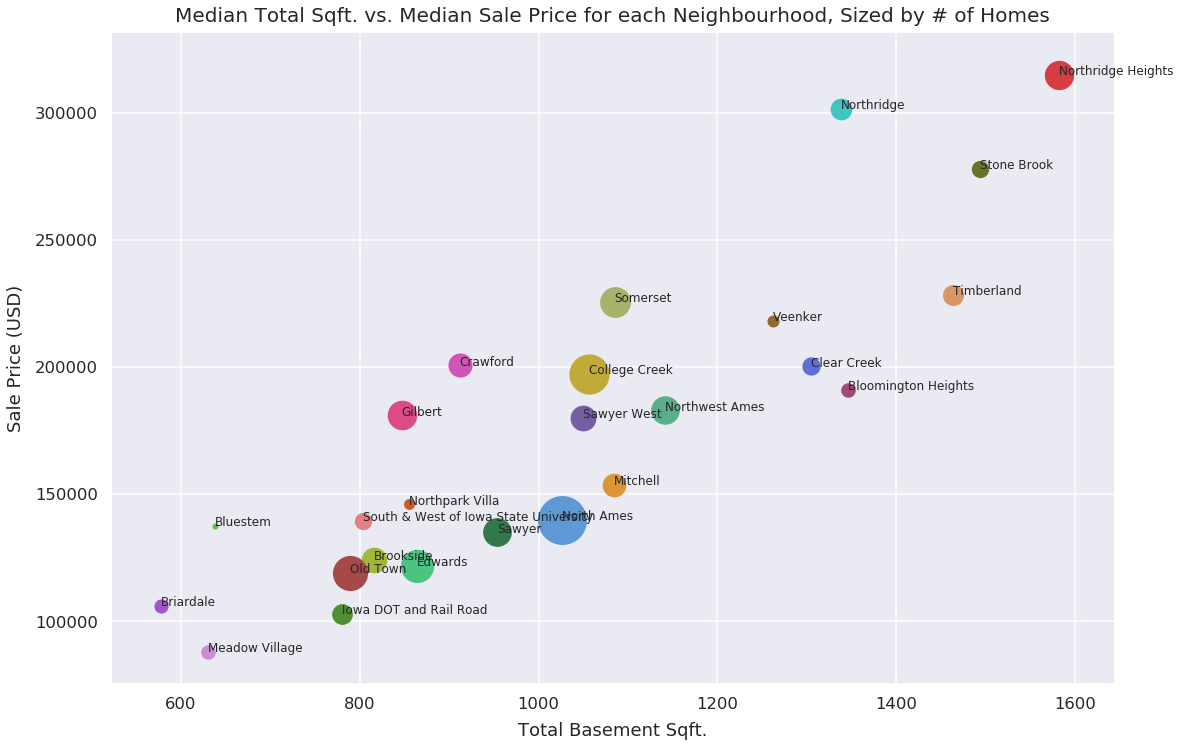

In [62]:
plt.figure(figsize=(18,12))

for neighbourhood, color in zip(neighbourhoods.index, palette):
    
    plt.scatter(neighbourhoods.loc[neighbourhood].TotalBsmtSF,
                neighbourhoods.loc[neighbourhood].SalePrice,
                s=neighbourhoods.loc[neighbourhood].Size*10,
                c=color,
                label=neighbourhood
               )
    plt.annotate(neighbourhood,
                 (neighbourhoods.loc[neighbourhood].TotalBsmtSF,
                  neighbourhoods.loc[neighbourhood].SalePrice),
                 fontsize=12)
    
plt.title("Median Total Sqft. vs. Median Sale Price for each Neighbourhood, Sized by # of Homes", fontsize=20, pad=10)
plt.ylabel("Sale Price (USD)", labelpad=10)
plt.xlabel("Total Basement Sqft.", labelpad=10)

- There is a linear relationship between median basement sqft. and sale price when looking perThe  neighbourhood
- Judging by the size of the dots you can see that more people live in homes that are between 800, 1200 sqft., while less live in homes that are at extremes on the spectrum
- Northridge, Northridge Heights, Stone Brook seem to be pricey neighbourhoods with bigger homes
- More exclusive to live in given smaller size of dots as well

**This plot may help explain why including neighbourhood increases the score of our regression**

## Feature Correlations

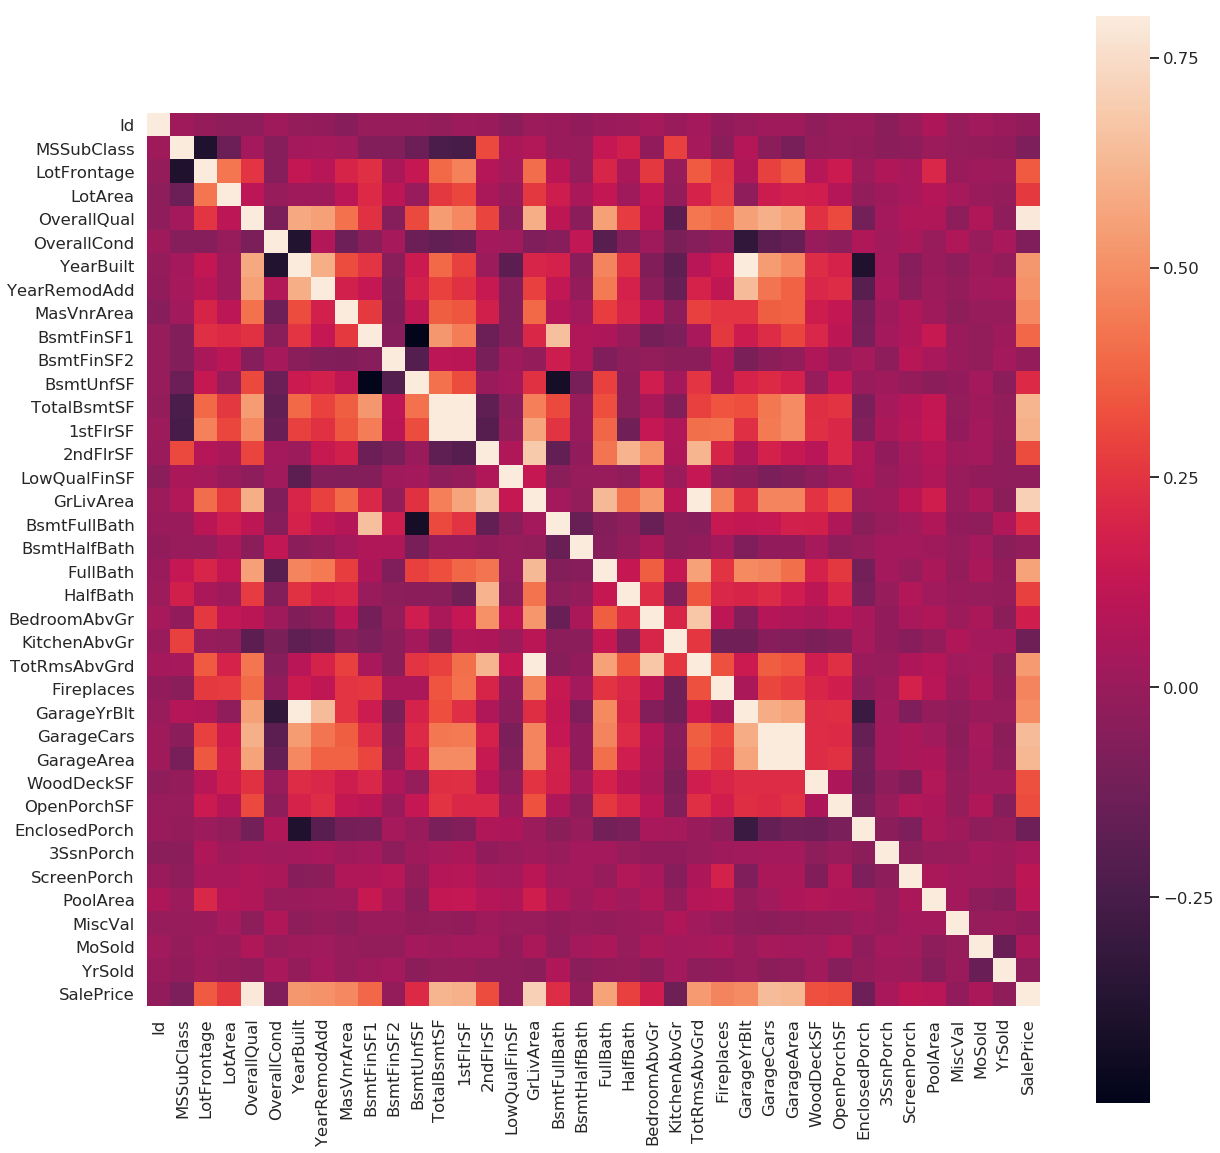

In [63]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8,square=True)

From the correlation heatmap we can see some signs of multi-collinearity between 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF' and between the 'GarageX' variables. They show significant correlation between them. It comes to show that the variables are giving us the exact same information.

Next lets look at the 10 largest variables that are correlated with SalePrice

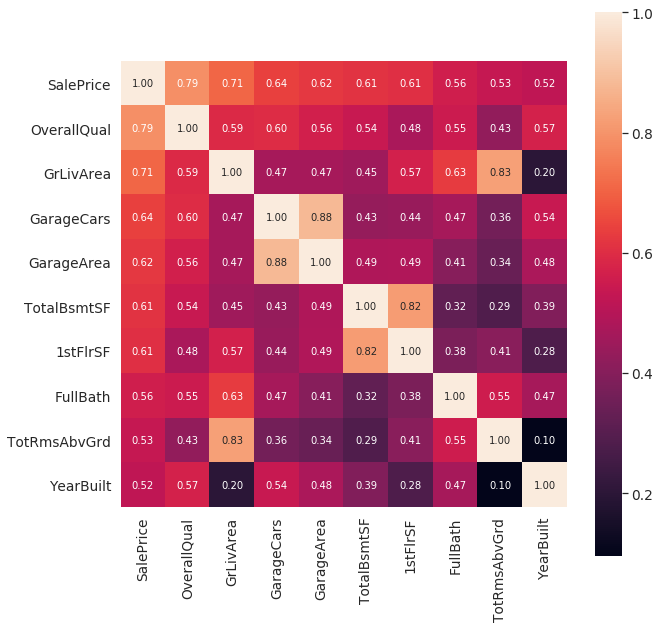

In [64]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


Now looking at this correalation heat map we can straight away see the most correlated variables with SalePrice. A few things to note like mentioned above are that 'TotalBsmtSF' and '1stFlrSF' are highly correlated with each other. Other factors that are highly correlated with each other include 'GarageCars', 'GarageArea', 'GrLivArea' and 'TotRmsAbvGrd'. This indicates multi-collinearity in our independenst variables. We can drop the factors that are least related to our target SalePrice. 

1) OverallQual

2) GrLivArea

3) GarageCars

4) TotalBsmtSF

5) FullBath 

6) YearBuilt

## OLS regression

In [65]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','Neighborhood','SalePrice']
housing_reg_data = housing[cols]
housing_reg_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood,SalePrice
0,7,1710,2,856,2,2003,CollgCr,208500
1,6,1262,2,1262,2,1976,Veenker,181500
2,7,1786,2,920,2,2001,CollgCr,223500
3,7,1717,3,756,1,1915,Crawfor,140000
4,8,2198,3,1145,2,2000,NoRidge,250000


In [66]:
ols_regression = sm.ols(formula = 'SalePrice ~ OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt+Neighborhood',data=housing_reg_data).fit()
print(ols_regression.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:06:46   Log-Likelihood:                -17334.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1429   BIC:                         3.489e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

Text(0.5, 1.0, 'Predictions vs. Original Prices')

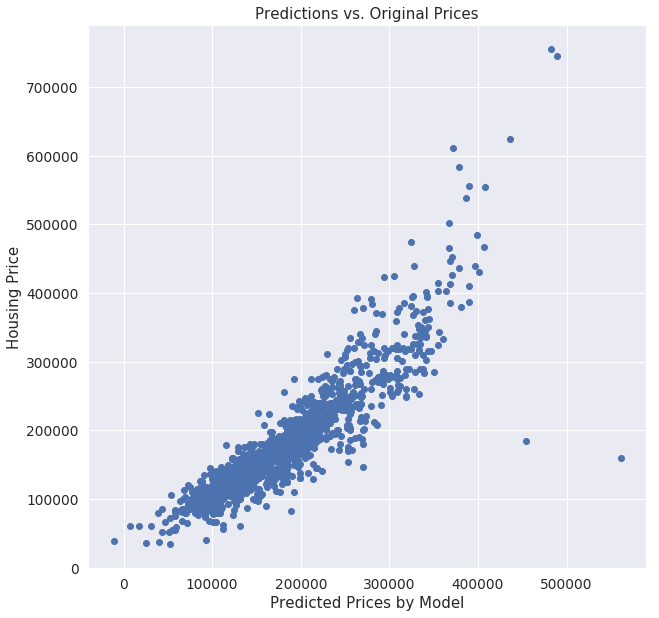

In [67]:

predicted_prices = ols_regression.fittedvalues

plt.subplots(figsize=(10, 10))
plt.scatter(predicted_prices, housing_reg_data.SalePrice)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

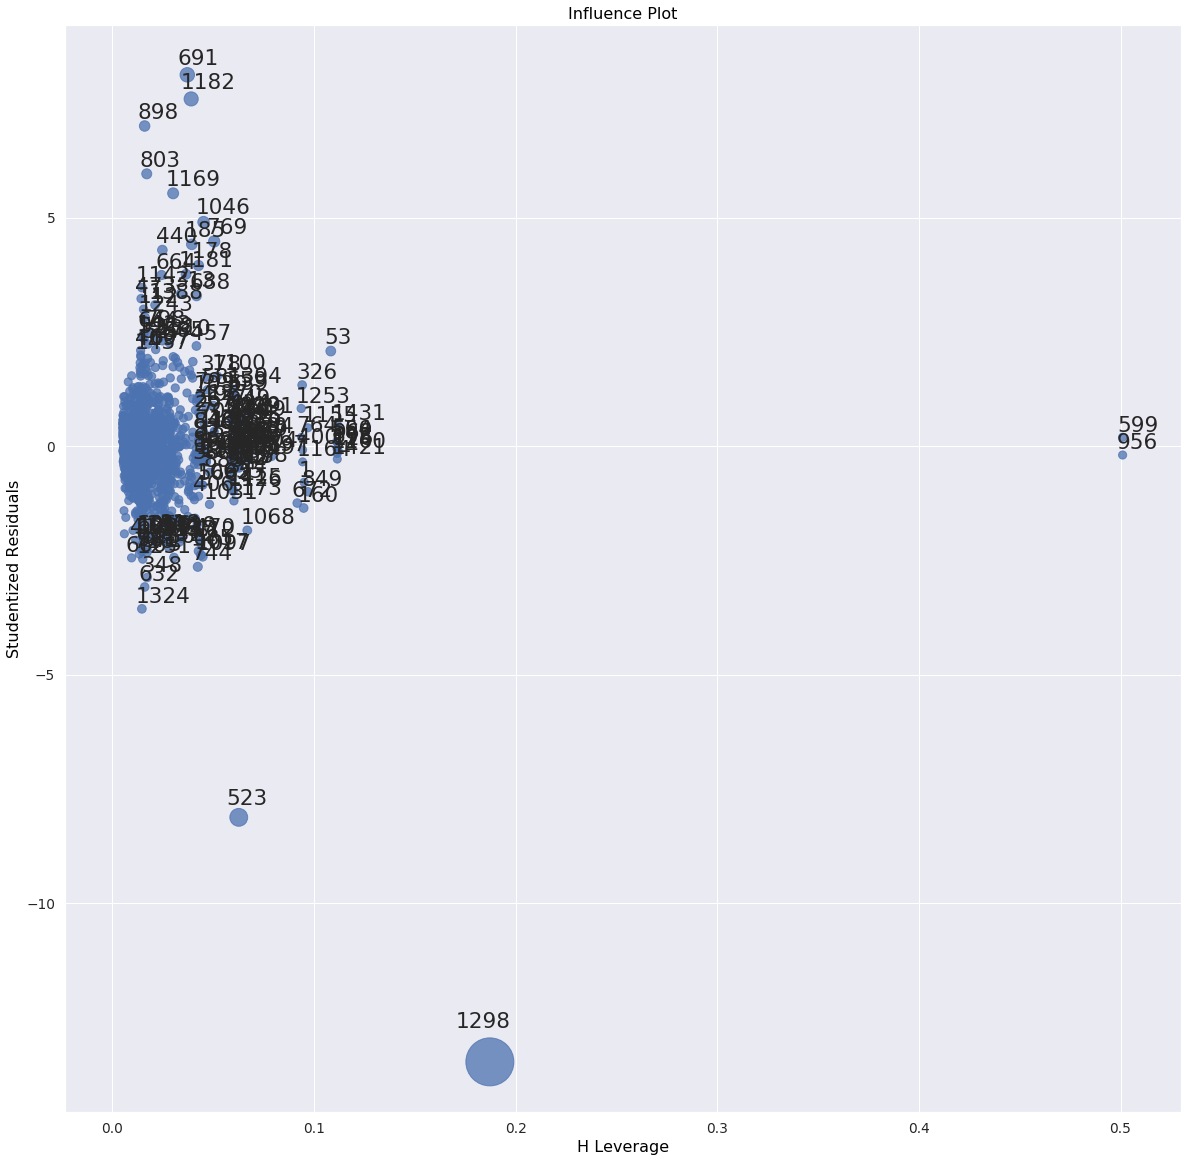

In [68]:
fig, ax = plt.subplots(figsize=(20,20))
fig = sm2.graphics.influence_plot(ols_regression, ax=ax, criterion="cooks")

Looking at the influence points in the graph above we can see some obvious outliers which can be removed and then the OLS can be run again to see the effects.

## Removing outliers

In [69]:
housing_reg_data2 = housing_reg_data.drop([691,
                                          1182,898,803,1169,1046,769,440,178,185,496,583,304,1178,1349,523,1298,632,
                                          1324,599,956])
ols_regression_new = sm.ols(formula = 'SalePrice ~ OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt+Neighborhood',
                            data=housing_reg_data2).fit()

print(ols_regression_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     291.7
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:06:51   Log-Likelihood:                -16719.
No. Observations:                1439   AIC:                         3.350e+04
Df Residuals:                    1409   BIC:                         3.366e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8

After removing the outliers the model seems to have improved sugnificantly from an R-squared of ~.80 to ~.85

Text(0.5, 1.0, 'Predictions vs. Original Prices')

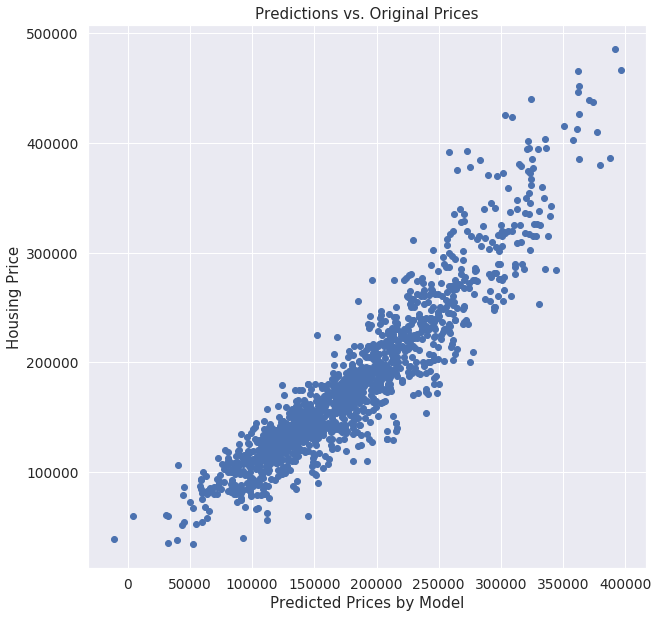

In [70]:
predicted_prices_new = ols_regression_new.fittedvalues

plt.subplots(figsize=(10, 10))
plt.scatter(predicted_prices_new, housing_reg_data2.SalePrice)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

You can see from the above graph that the predictions are not that dispersed and there are less outliers.

In [ ]:
ols_regression_new.p